# import basic library

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def adjust(w=16, h=5, dpi=200):
    plt.figure(figsize=(w, h), dpi=dpi)

# load the data

In [3]:
df = pd.read_csv('wholesome-customers-data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# exploratory data analysis

In [4]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe().round()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.0,440.0,440.0,440.0,440.0,440.0,440.0,440.0
mean,1.0,3.0,12000.0,5796.0,7951.0,3072.0,2881.0,1525.0
std,0.0,1.0,12647.0,7380.0,9503.0,4855.0,4768.0,2820.0
min,1.0,1.0,3.0,55.0,3.0,25.0,3.0,3.0
25%,1.0,2.0,3128.0,1533.0,2153.0,742.0,257.0,408.0
50%,1.0,3.0,8504.0,3627.0,4756.0,1526.0,816.0,966.0
75%,2.0,3.0,16934.0,7190.0,10656.0,3554.0,3922.0,1820.0
max,2.0,3.0,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0


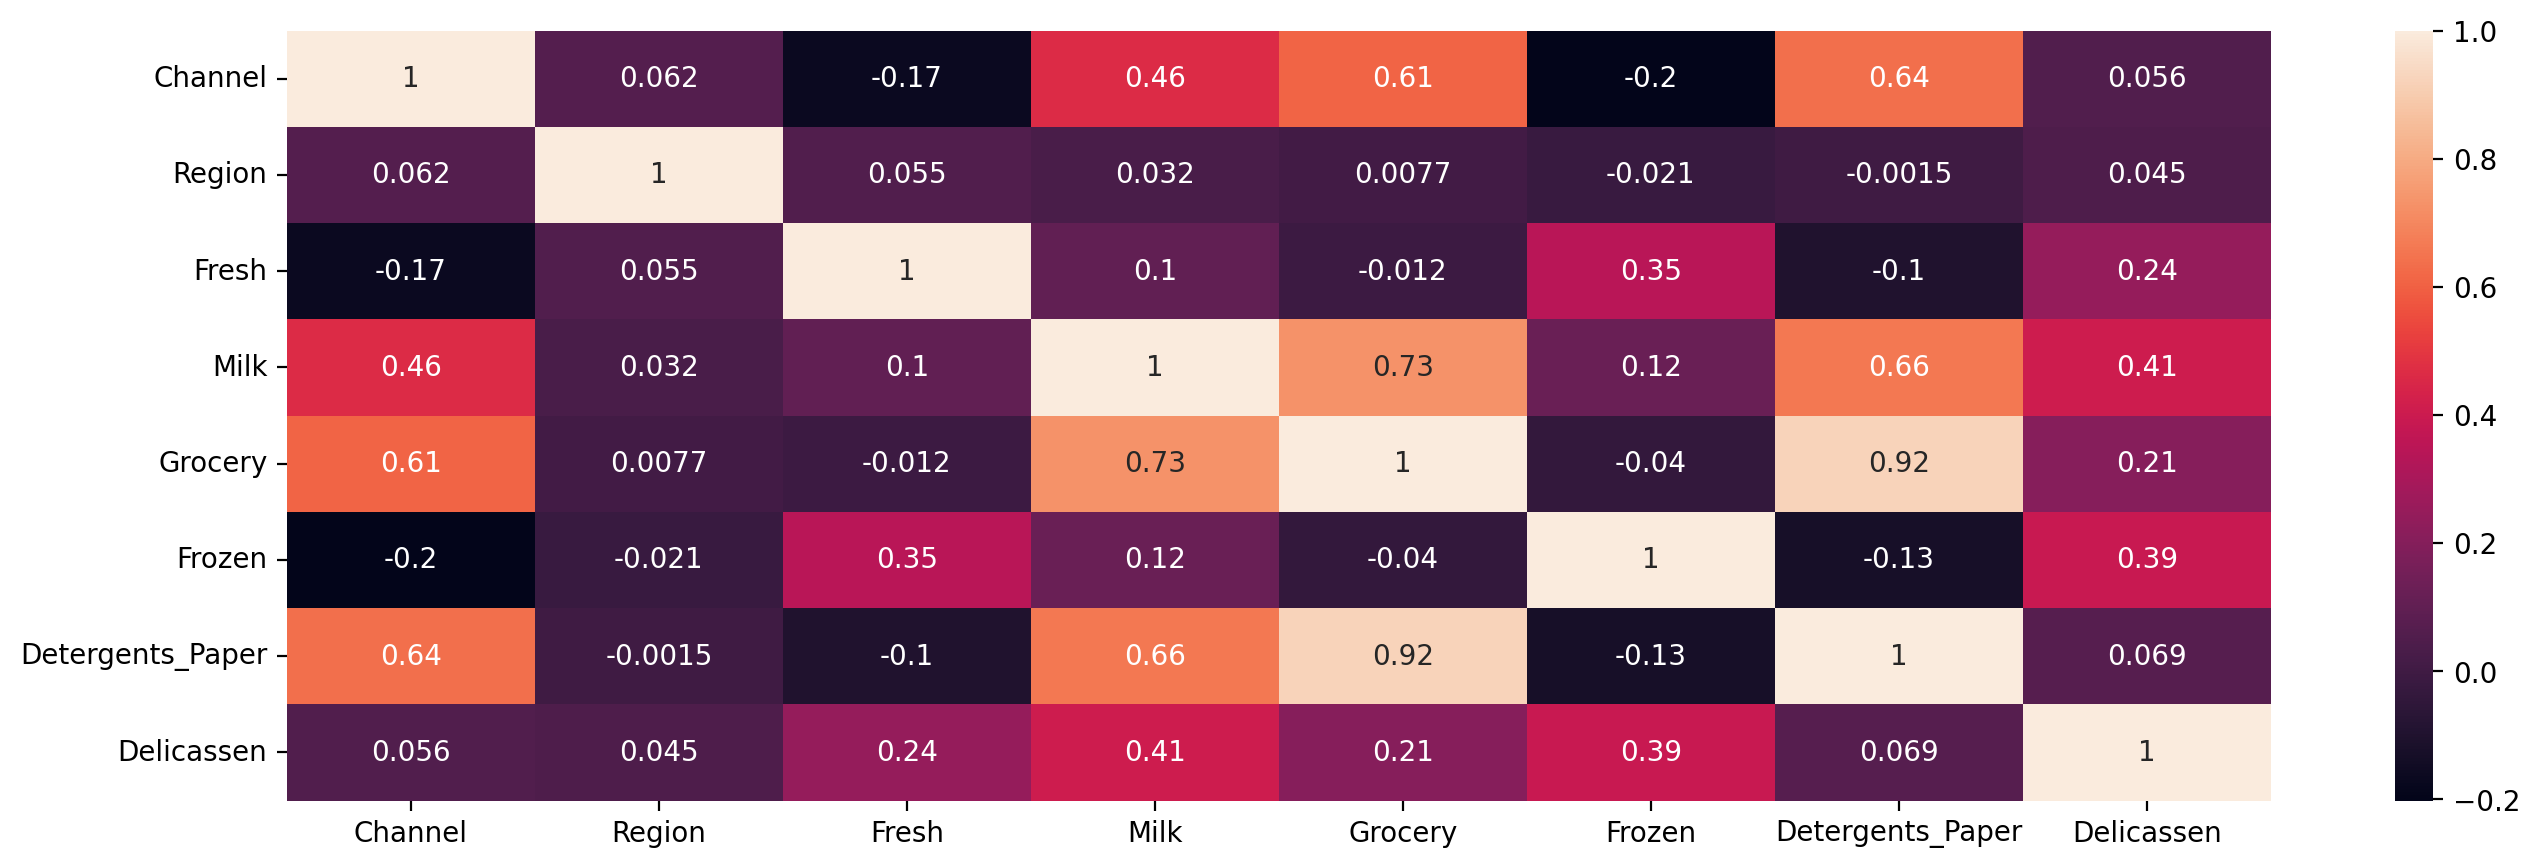

In [7]:
adjust()
sns.heatmap(df.corr(), annot=True)
plt.show()

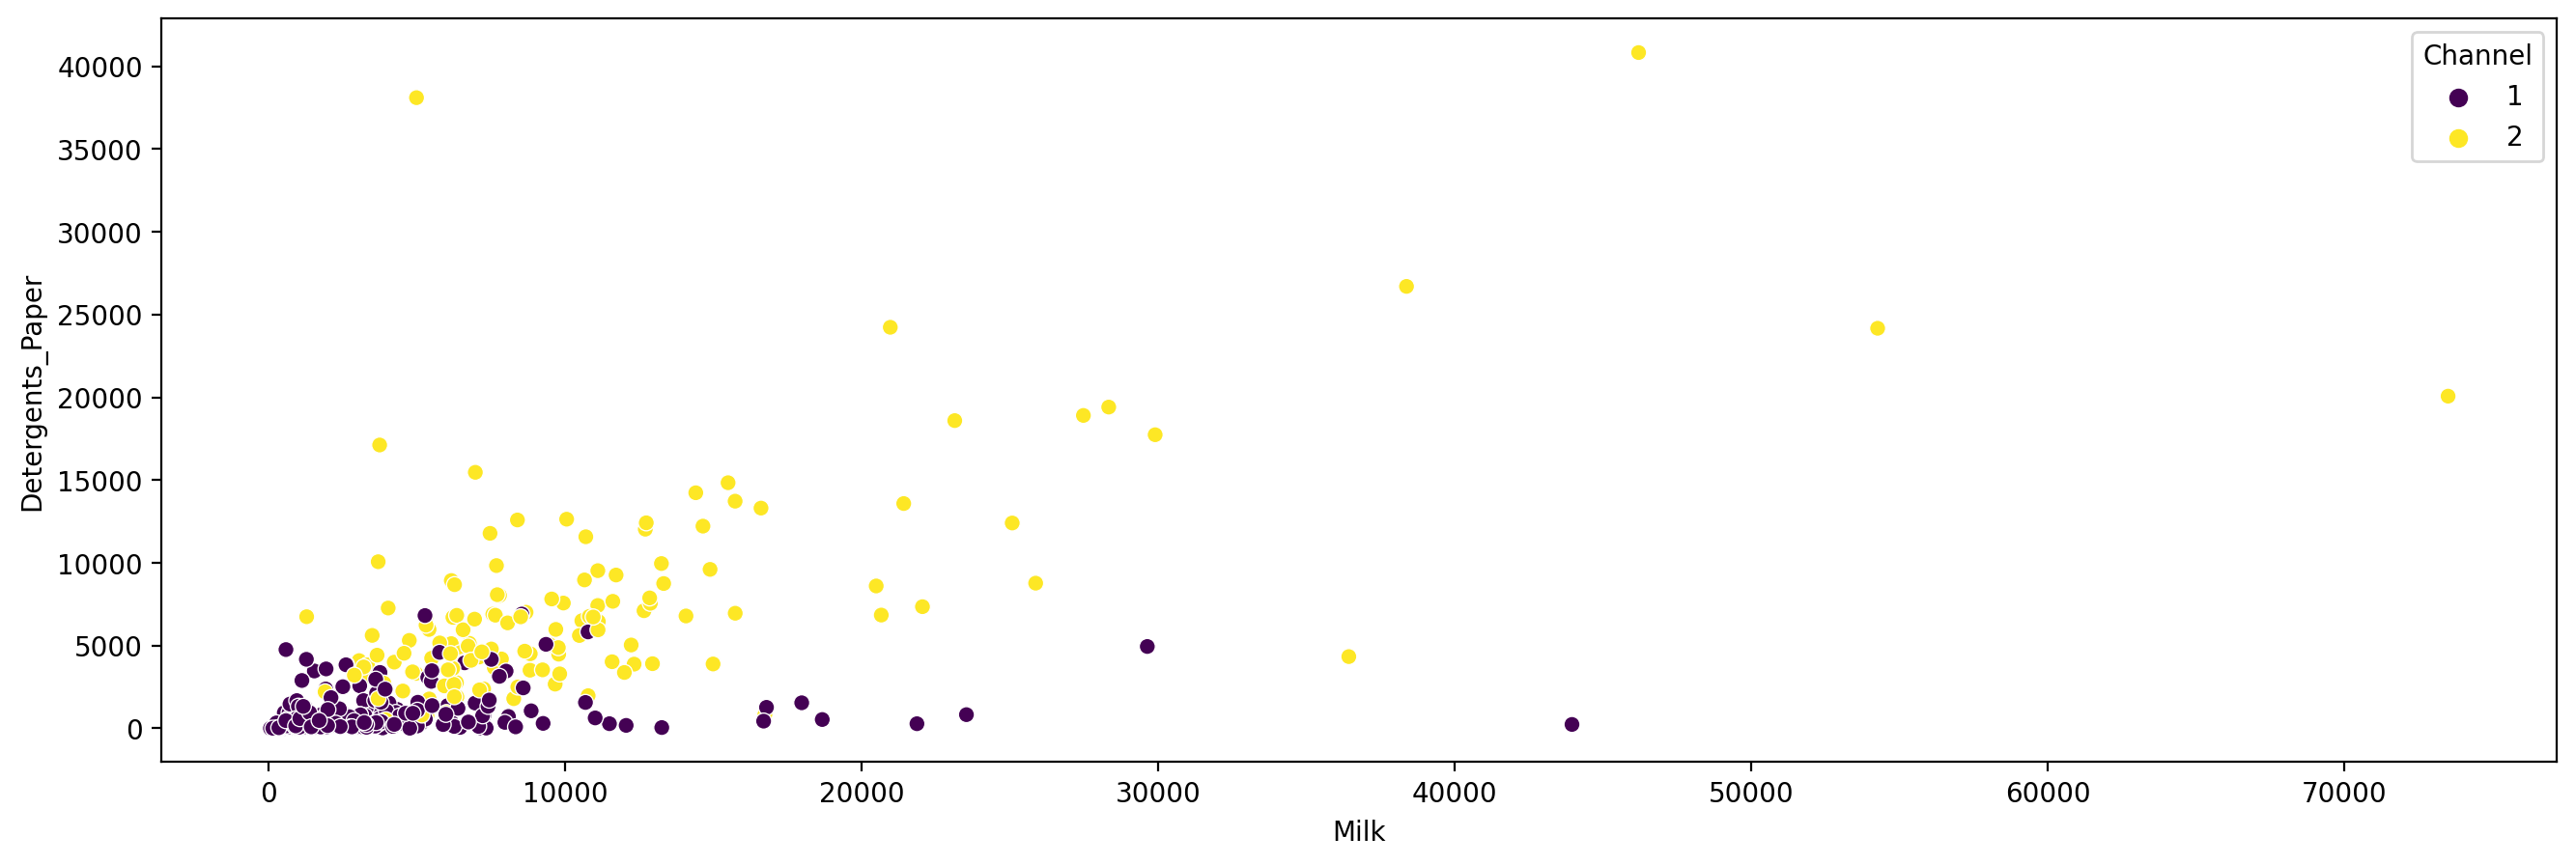

In [8]:
adjust()
sns.scatterplot(data=df, x='Milk', y='Detergents_Paper', hue='Channel', palette='viridis')
plt.show()

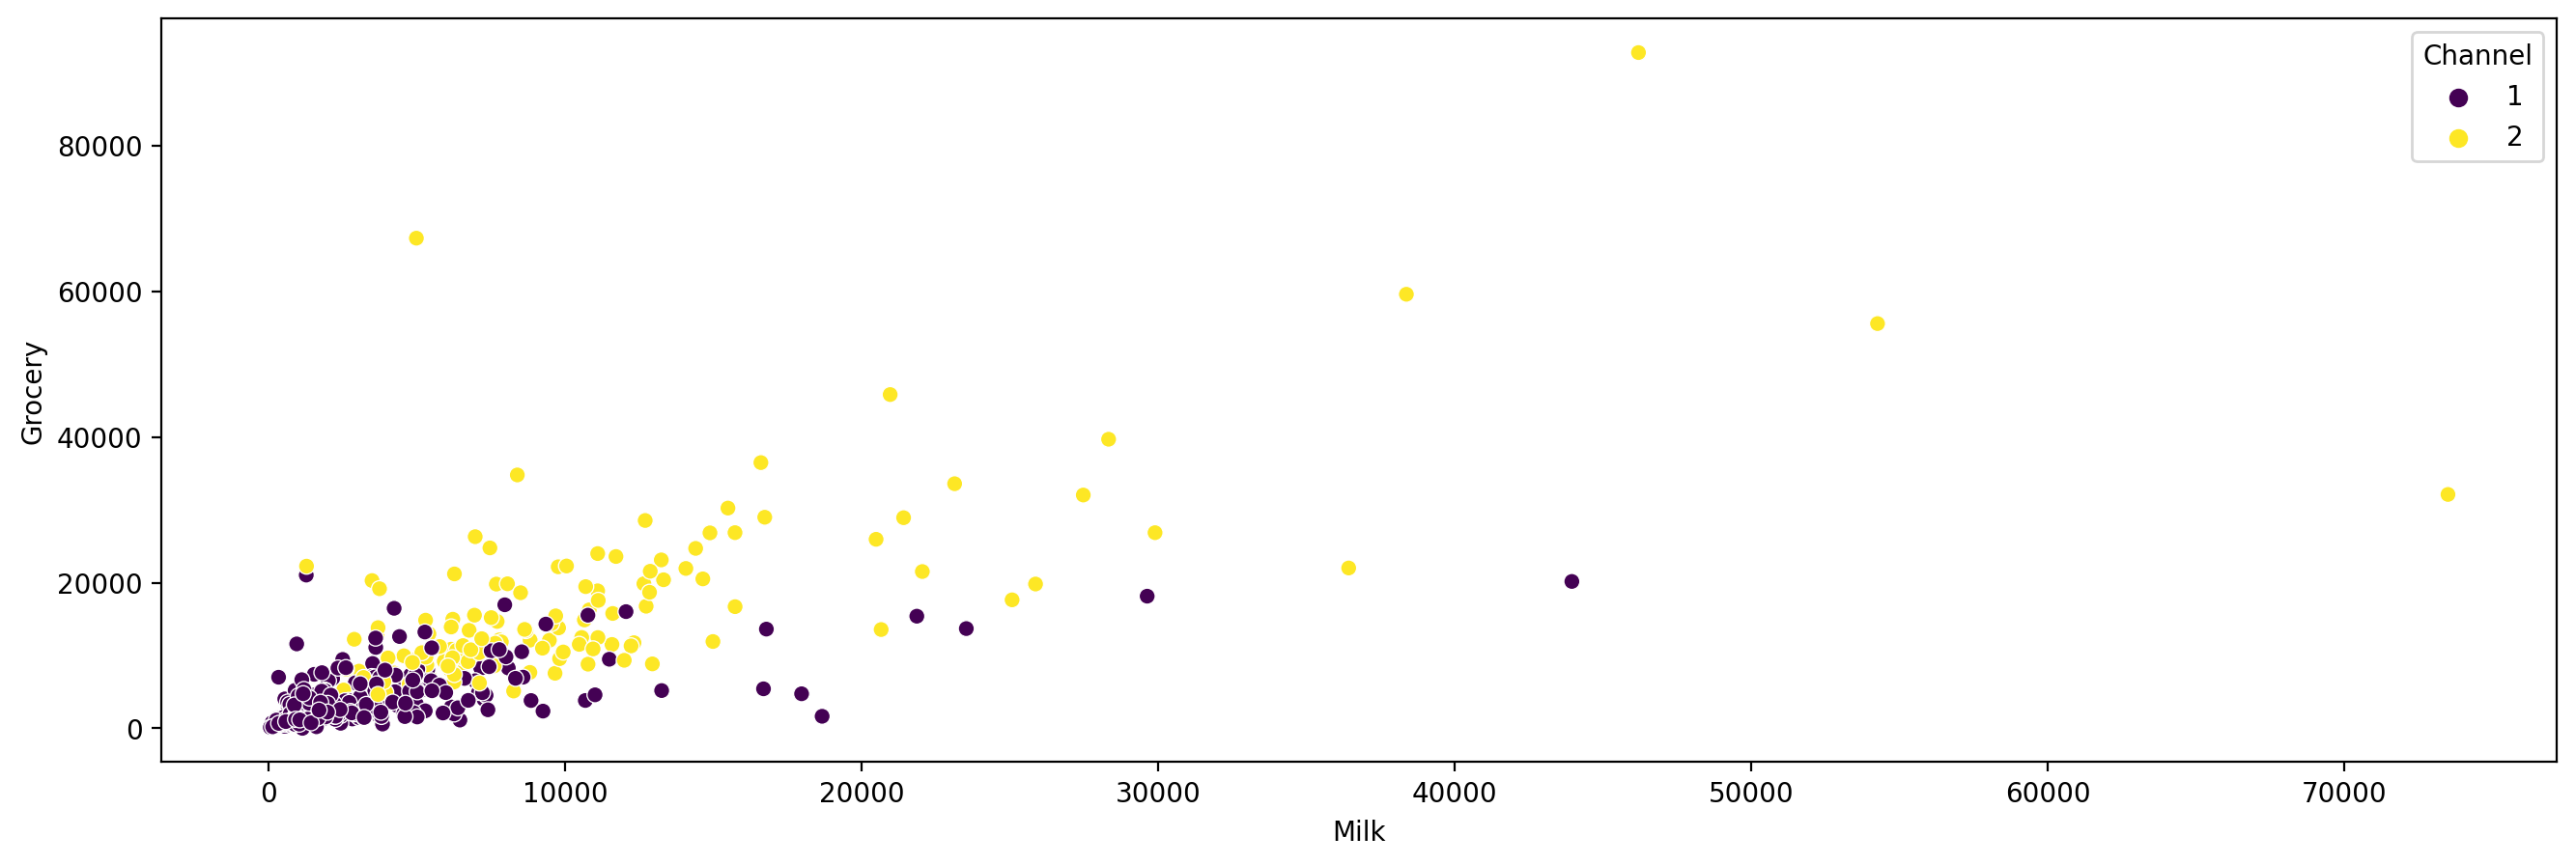

In [9]:
adjust()
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel', palette='viridis')
plt.show()

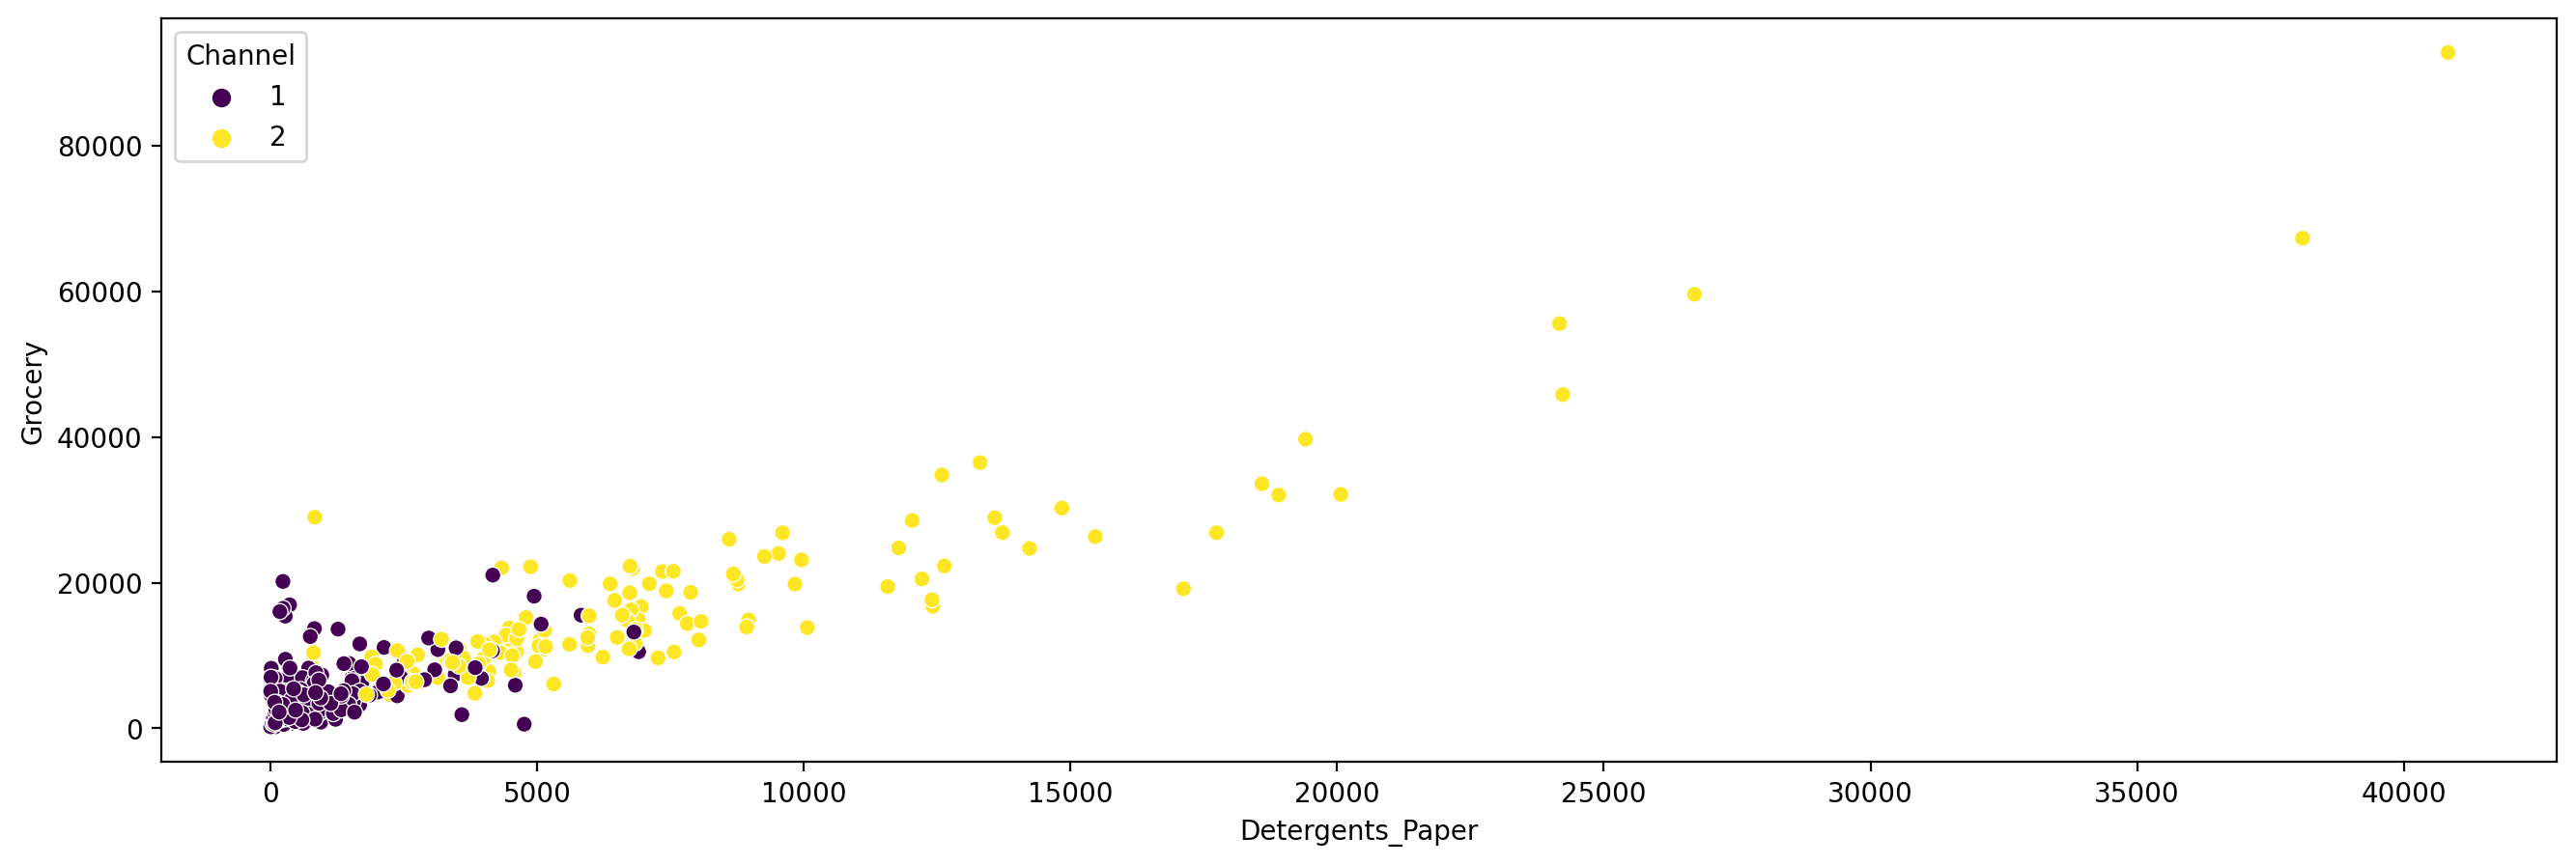

In [10]:
adjust()
sns.scatterplot(data=df, x='Detergents_Paper', y='Grocery', hue='Channel', palette='viridis')
plt.show()

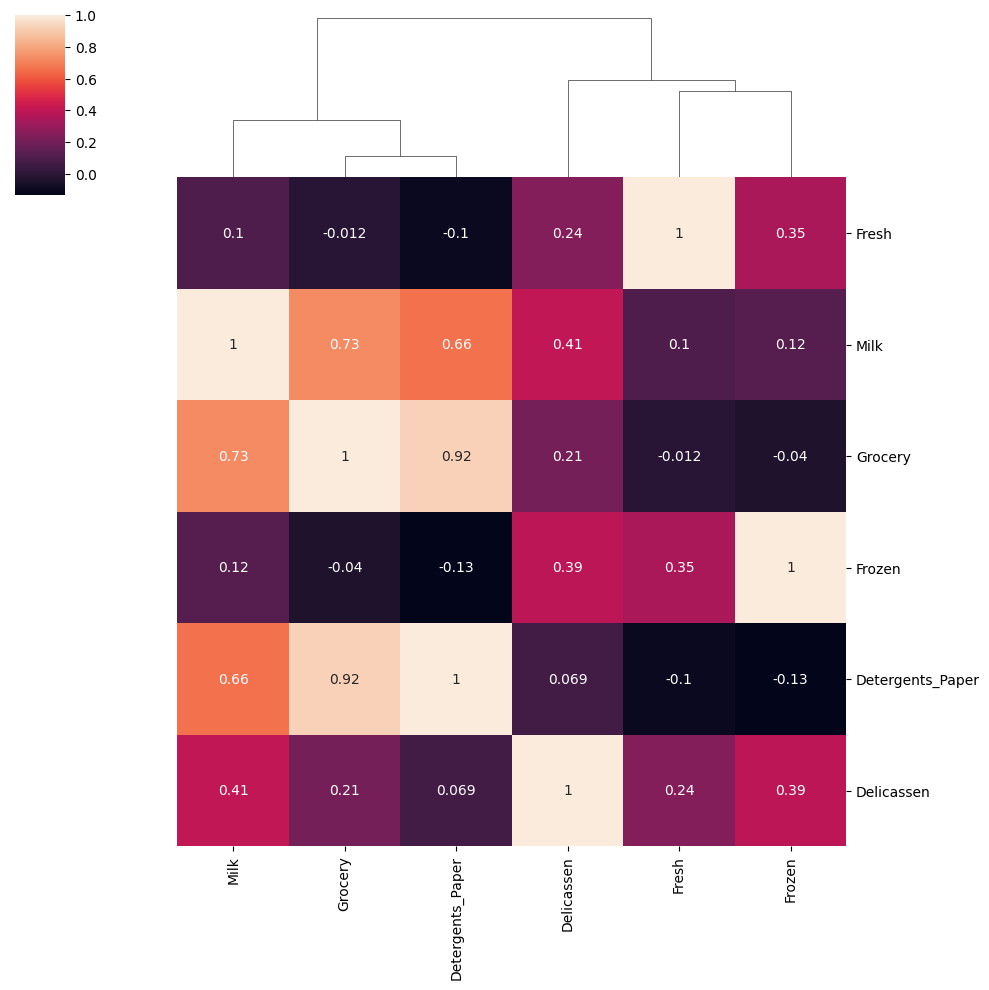

In [11]:
sns.clustermap(data=df.drop(['Region', 'Channel'], axis=1).corr(), row_cluster=False, annot=True);

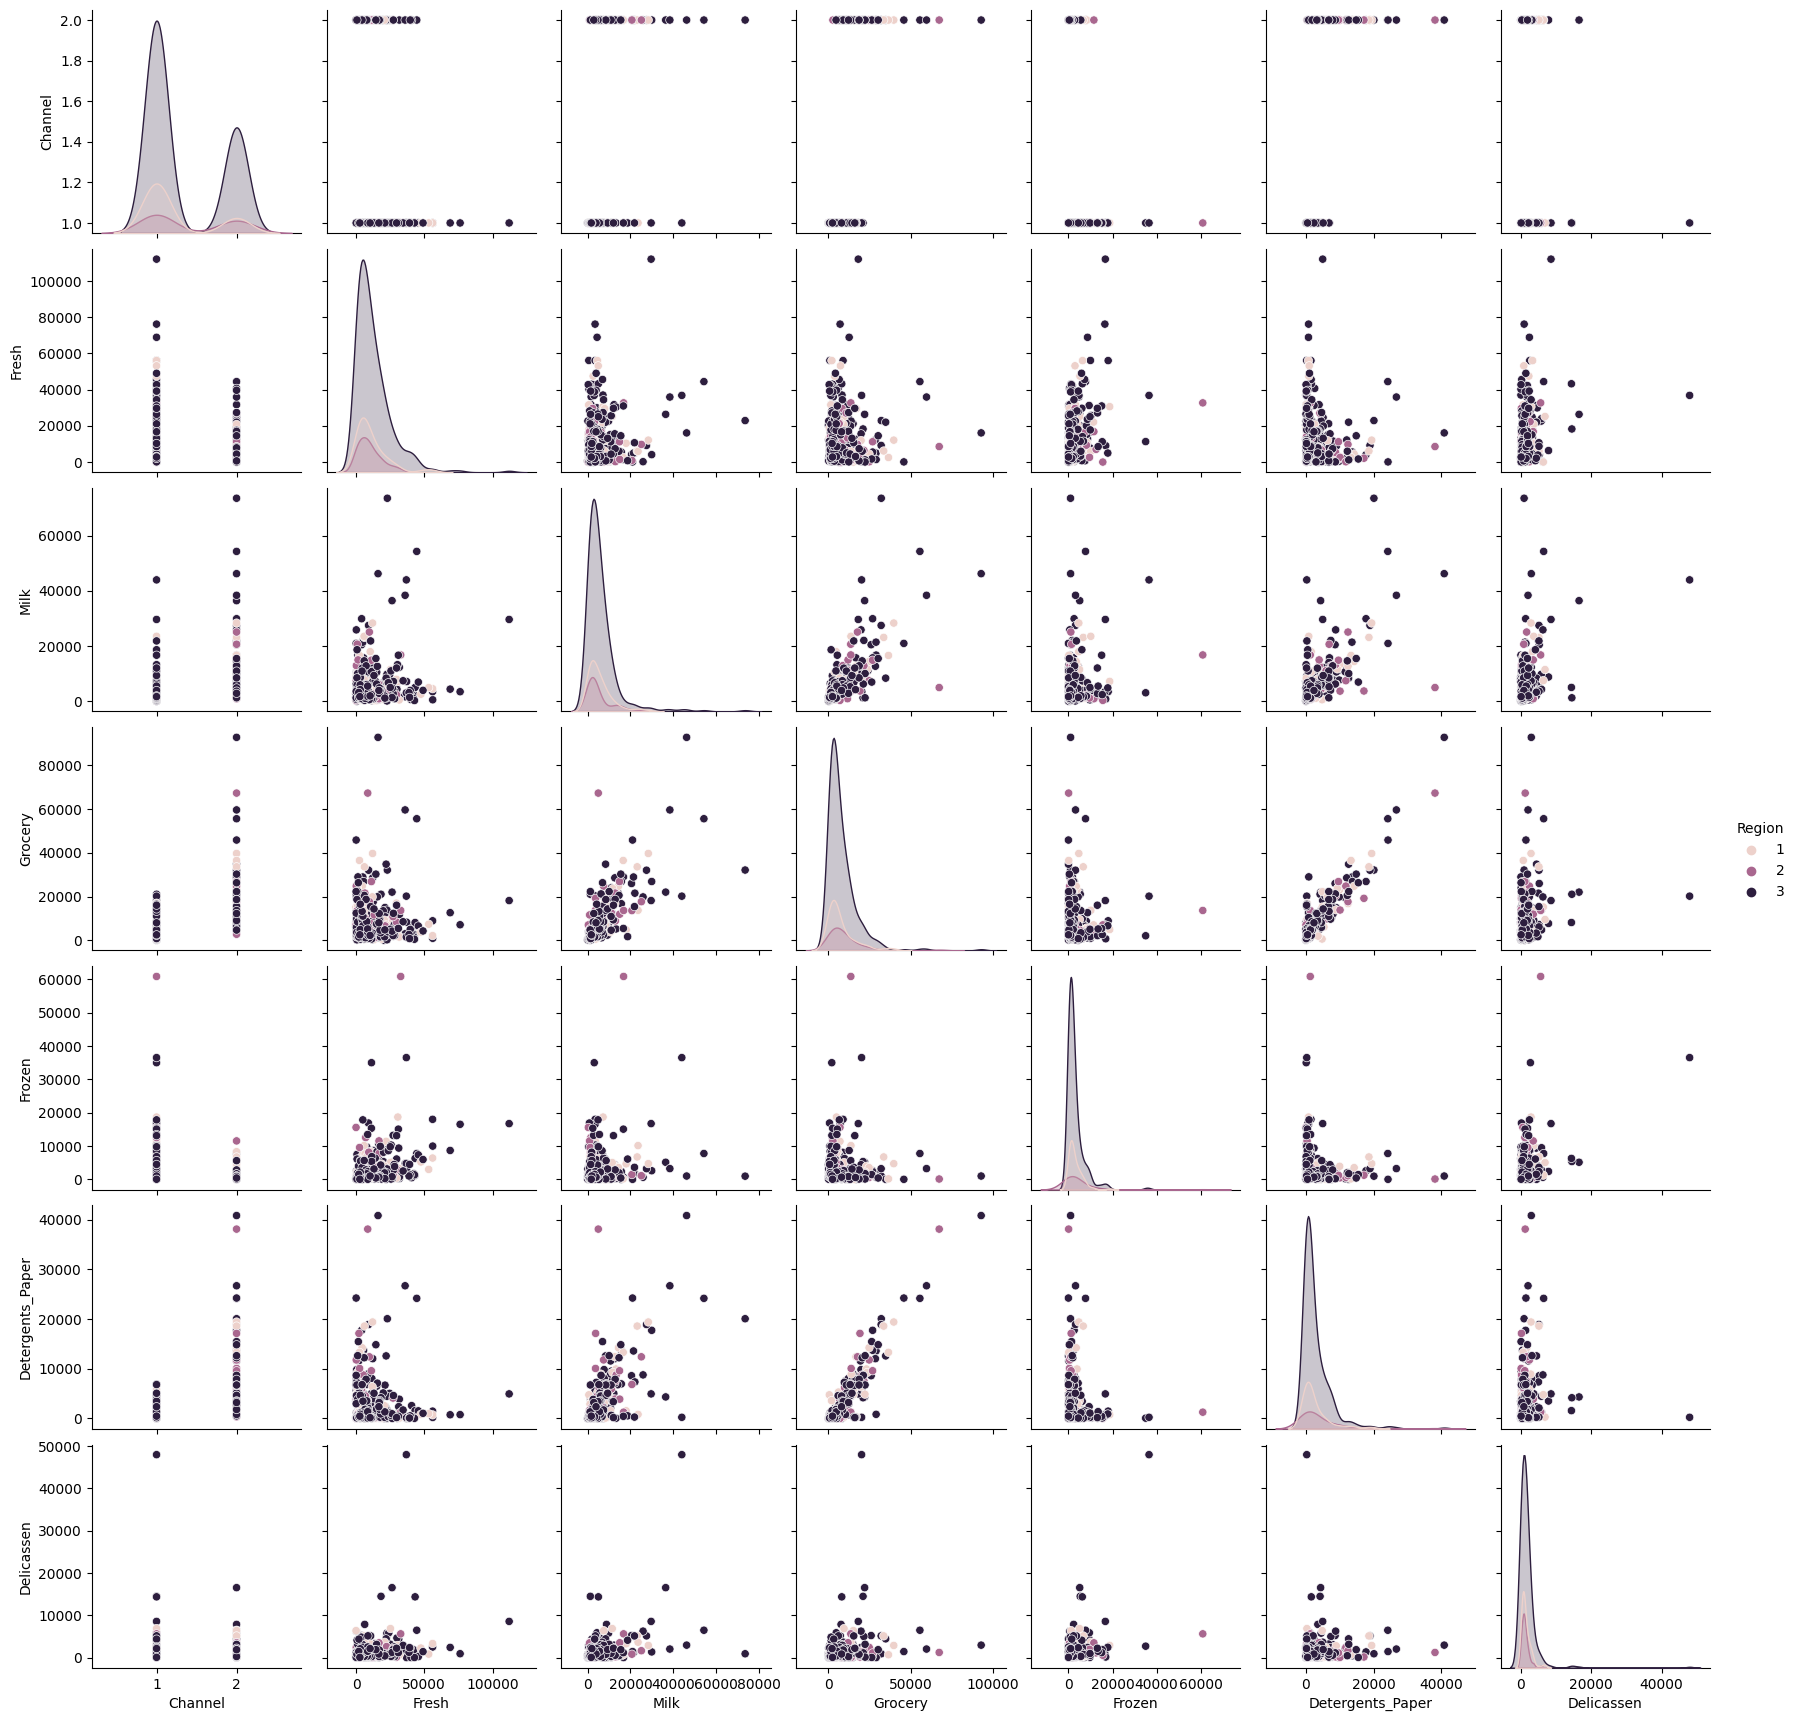

In [12]:
sns.pairplot(data=df, hue='Region');

# build the algorithm

In [13]:
x = pd.get_dummies(data=df)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_scale = scale.fit_transform(x)

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
outlier_percent = []
eps = np.linspace(0.001, 3, 50)

for e in eps:
    dbscan = DBSCAN(eps=e, min_samples=2*x_scale.shape[1])
    dbscan.fit(x_scale)
    percent = 100*np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(percent)

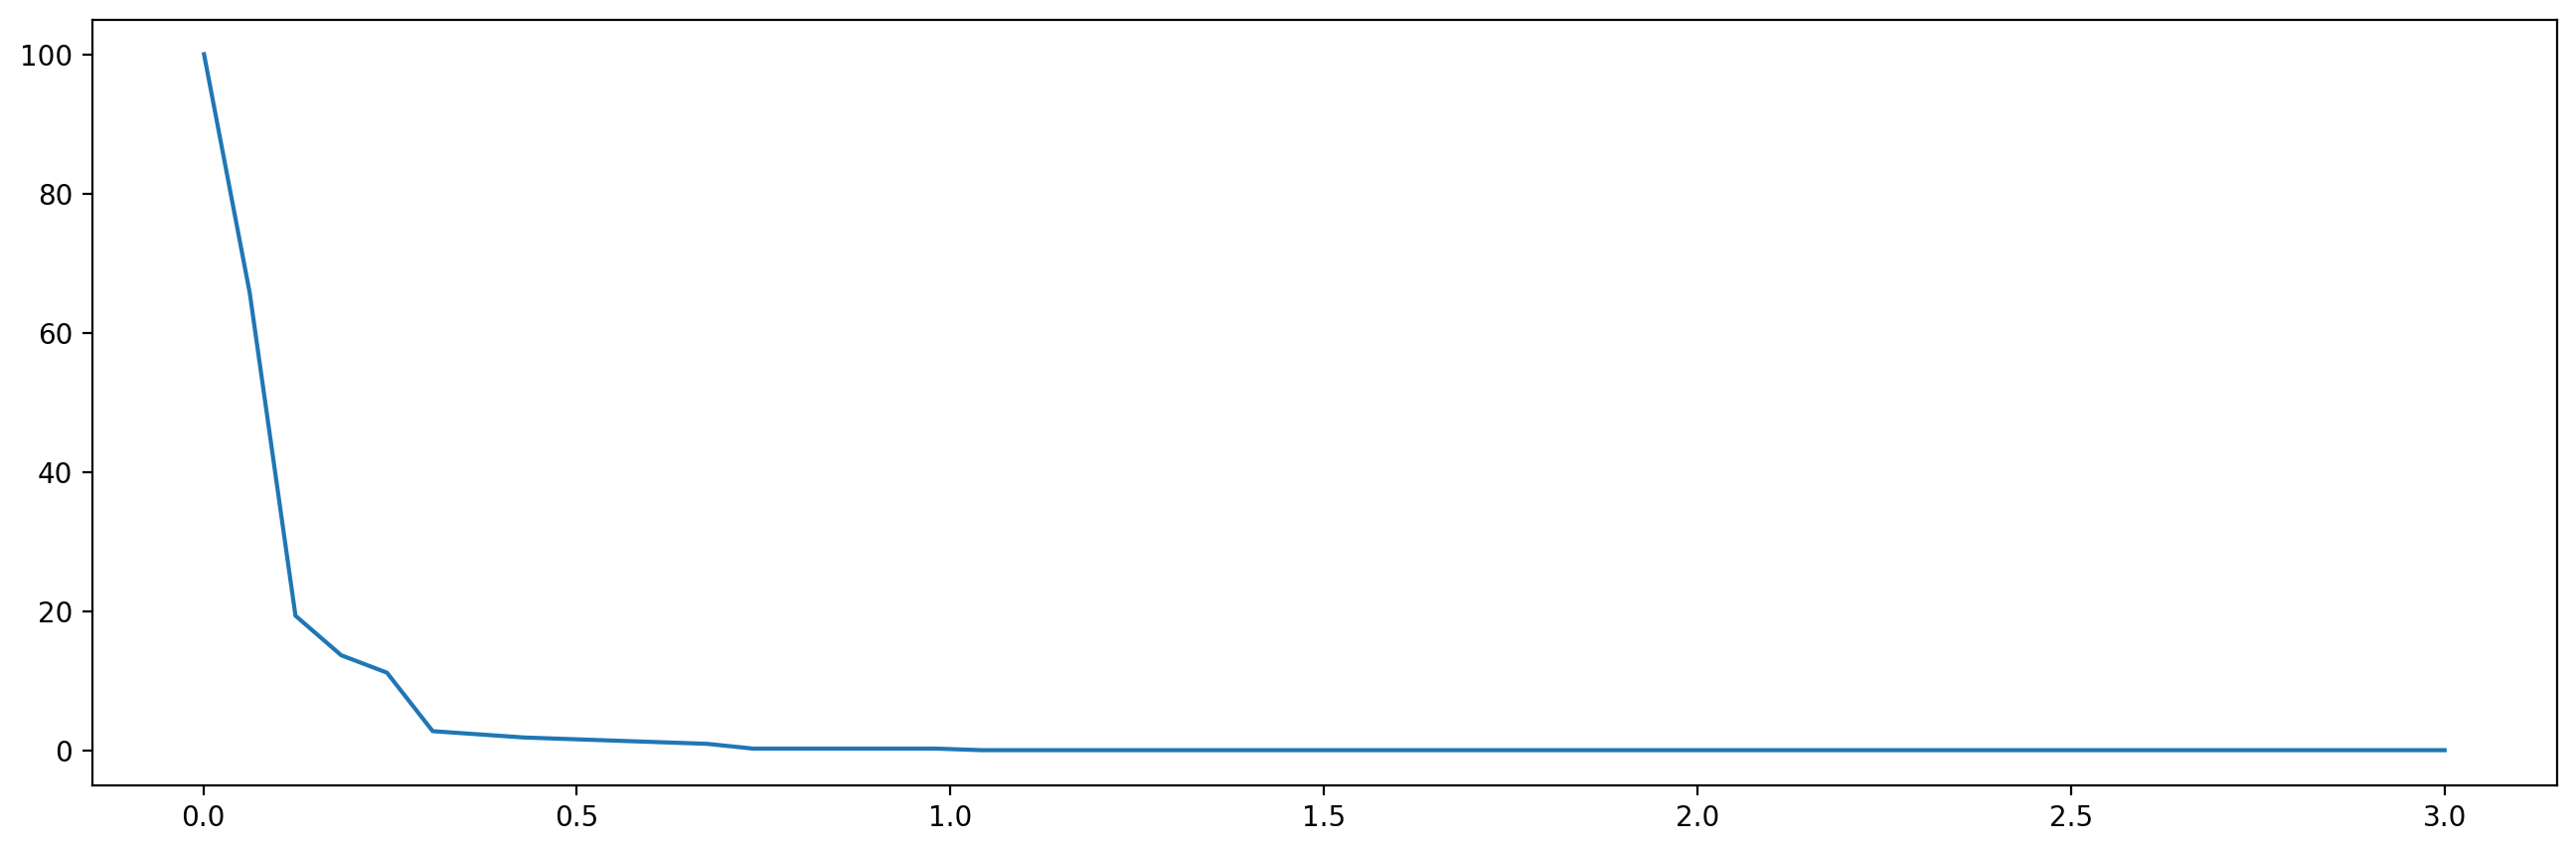

In [17]:
adjust()
sns.lineplot(x=eps, y=outlier_percent);

In [18]:
dbscan_revised = DBSCAN(eps=1, min_samples=x_scale.shape[1])
dbscan_revised.fit(x_scale)

DBSCAN(eps=1, min_samples=8)

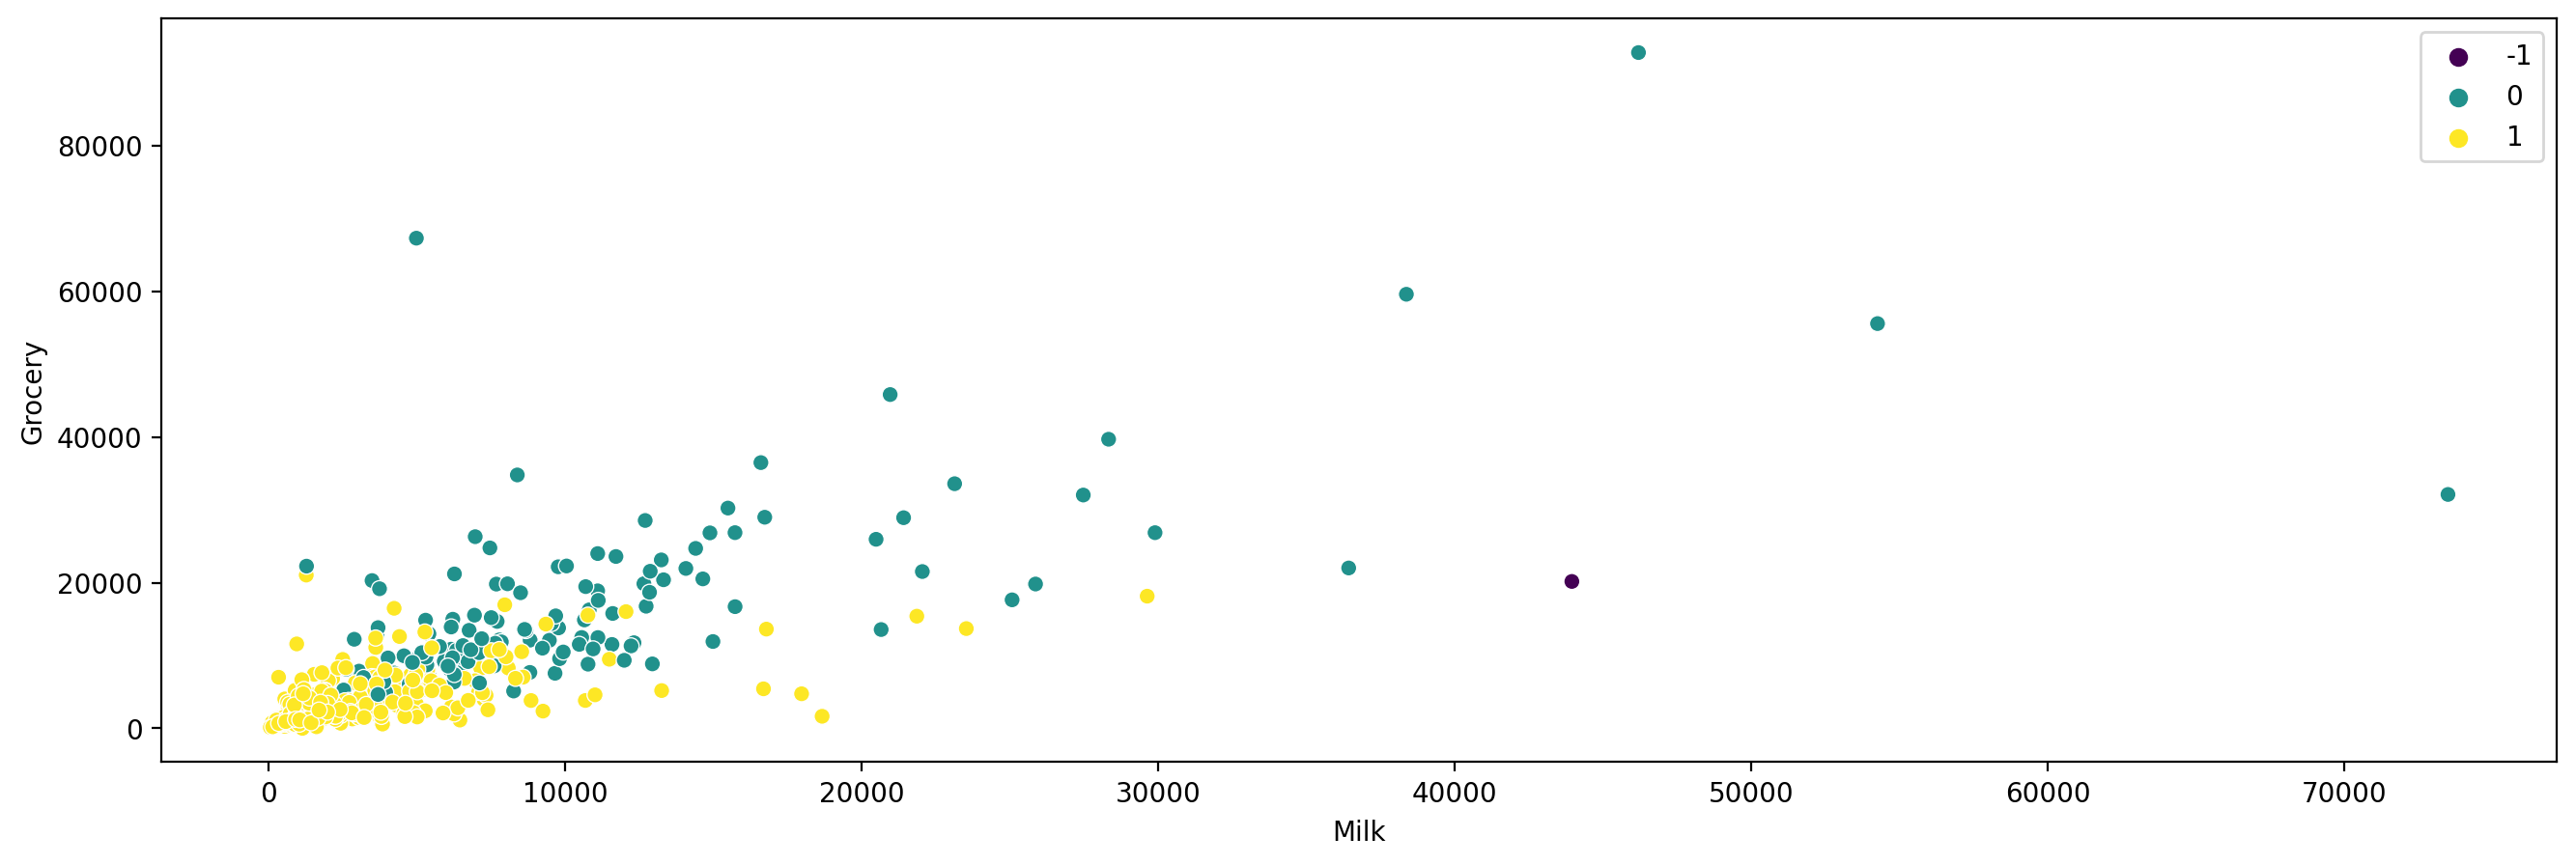

In [19]:
adjust()
sns.scatterplot(data=df, x='Milk', y='Grocery', hue=dbscan_revised.labels_, palette='viridis');

AttributeError: 'DBSCAN' object has no attribute 'labels'

In [23]:
category = df.drop(['Channel','Region'], axis=1)
category['label'] = dbscan_revised.labels_
category.label.value_counts()

 1    297
 0    142
-1      1
Name: label, dtype: int64

In [24]:
pivot = pd.pivot_table(data=category, index=dbscan_revised.labels_, aggfunc='mean').round(3)
pivot

,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,label
-1,47943.000,239.000,36847.000,36534.000,20170.000,43950.000,-1
0,1753.437,7269.507,8904.324,1652.613,16322.852,10716.500,0
1,1259.300,792.418,13396.869,3637.862,3907.566,3315.367,1
